In [1]:
# PCA - Principal Component Analysis

# Principal Component Analysis (PCA) = main idea is feature/dimensionality reduction
# PCA reduces correlated features because correlated features contribute to the same principal component

# It is a linear dimensionality reduction technique that uses a high-dimensional feature space by projecting it 
# into a lower-dimensional sub-space. 

# It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts 
# with fewer variation. 
# It can be used to help filter through many features and find the most relevant ones (or through some linear combination).

# PCA is unsupervised. PCA uses statistical procedures that use orthogonal transformations to convert a set of observations of
# correlated variables (numerical values) into a set of values of linearly uncorrelated variables called principal components.

# Use cases: Breast cancer data, image recognition (frog vs. cat)
"""
Input = Breast Cancer Data / Image Pixel Data
Output = Build a number of principal components
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sample data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# First standardize the data
# output is scaled_data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [4]:
# Run PCA
from sklearn.decomposition import PCA

# how many components out of the 30 features do you want to keep
# in this example we choose 2 for easier visualization
# if n_components = None, then n_components = min(n_samples, n_features) - 1
pca = PCA(n_components = 2)

# run the model
# PCA will be applied on all the columns except the target data
pca.fit(scaled_data)

# get the output which is the principal components of the pca model
x_pca = pca.transform(scaled_data)  # 569x2 is the shape


# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [5]:
print('before: ' , scaled_data.shape , ' after: ' , x_pca.shape)

before:  (569, 30)  after:  (569, 2)


In [6]:
# now we can run some metrics 

# explained variance = amount of information or variance each principal component holds 
# after projecting the data to a lower dimensional subspace

print(pca.explained_variance_ratio_) # print(pca.explained_variance_)

# here we have 44% + 18% = 62% so we lost 38% of information from PCA

[0.44272026 0.18971182]


Text(0, 0.5, 'Second Principal Component in PCA')

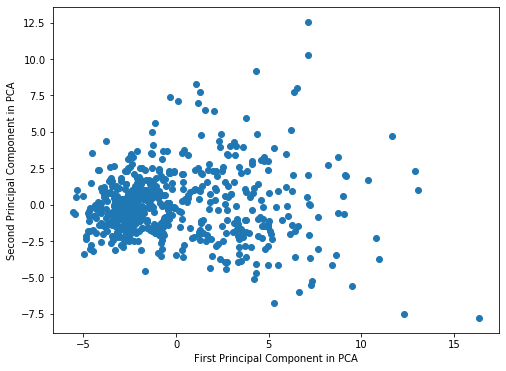

In [7]:
# Plot the two components
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component in PCA')
plt.ylabel('Second Principal Component in PCA')

In [13]:
# build a dataframe to show PCA components and training results
new_pca_df = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2'])

# normally would use the x training against the y training but we did not build one here
# new_pca_df['y'] = y_train
new_pca_df['y_target'] = cancer['target']

new_pca_df

,principal component 1,principal component 2,y_target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


Text(0, 0.5, 'Second Principal Component in PCA')

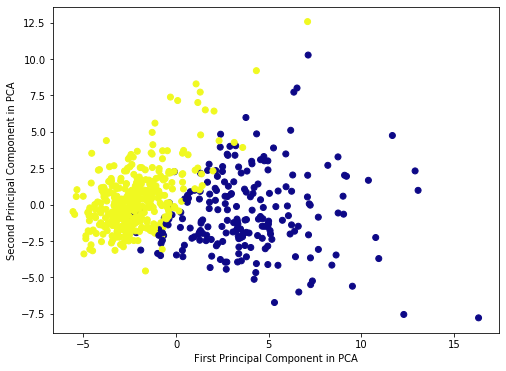

In [9]:
# how good is PCA
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component in PCA')
plt.ylabel('Second Principal Component in PCA')
# the components are combinations of the features, not singular features

In [10]:
# put the PCA model into a dataframe
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
df_comp

# show factors and how it relates back to original 30 features?
# positive is positively correlated (and magnitude)
# negative is negatively correlated (and magnitude)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [11]:
# check the prediction vs reality
x_pca[:,0]
x_pca[:,1]
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


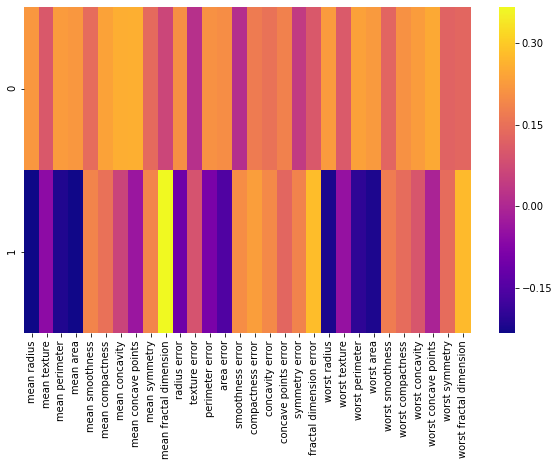

In [12]:
# visualize the PCA output
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df_comp, cmap='plasma')
# the heat map shows the correlation to the features
# each principal component is a row, 
# and you'll see which one is more important vs. the original 30

AttributeError: 'PCA' object has no attribute 'predict'